<a href="https://colab.research.google.com/github/murpunk/Programming_2023/blob/main/15_05_23_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#I. Прочитайте и повторите примеры из книги *Андреас Мюллер, Сара Гвидо. Введение в машинное обучение с помощью Python. Руководство для специалистов по работе с данными.* со страниц 295-320.


Пример: попытка построить модель, предсказывающую, кликнет пользователь на ссылку или нет. Нам известно, что он кликает только в 1% случаев из 100. Выборка получается несбалансированная по объёму примеров.

## 1. Пример с цифрами

In [19]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np

In [20]:
digits = load_digits()

In [ ]:
digits

In [21]:
y = digits.target == 9

In [22]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state = 0)

In [23]:
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy = "most_frequent").fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print(f"Уникальные спрогнозированные метки: {np.unique(pred_most_frequent)}")
print(f"Правильность на тестовом наборе: {round(dummy_majority.score(X_test, y_test), 2)}")

Уникальные спрогнозированные метки: [False]
Правильность на тестовом наборе: 0.9


In [24]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print(f"Правильность на тестовом наборе: {round(tree.score(X_test, y_test), 2)}")

Правильность на тестовом наборе: 0.92


In [ ]:
from sklearn.linear_model import LogisticRegression
dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print(f"Правильность dummy: {round(dummy.score(X_test, y_test), 2)}")
logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print(f"Правильность logreg: {round(logreg.score(X_test, y_test), 2)}")

In [26]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, pred_logred)
print(f"Confusion matrix: \n{confusion}")

Confusion matrix: 
[[402   1]
 [  6  41]]


402 -- правильно отнесённые к отрицательным (TN)
6 -- положительные, которые были неверно отнесены к отрицательным (FN)
41 -- правильно отнесённые к положительным (TP)
1 -- отрицательные, неверно отнесённые  положительным (FP)

In [27]:
print("Наиболее часто встречающийся класс:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\nDummy-модель:")
print(confusion_matrix(y_test, pred_dummy))
print("\nДерево решений:")
print(confusion_matrix(y_test, pred_tree))
print("\nЛогистическая регрессия:")
print(confusion_matrix(y_test, pred_logreg))

Наиболее часто встречающийся класс:
[[403   0]
 [ 47   0]]

Dummy-модель:
[[403   0]
 [ 47   0]]

Дерево решений:
[[390  13]
 [ 24  23]]

Логистическая регрессия:
[[402   1]
 [  6  41]]


## Метрики

**Правильность**: $\frac{TP + TN}{TP + TN + FP + FN}$


То есть количество верно классифицированных примеров на общее количество примеров.

**Точность** (precision): $\frac{TP}{TP + FP}$


Сколько из предсказанных положительных примеров оказались действительно положительными. Точность важна, когда необходимо снизить количество ложноположительных примеров.


Эта метрика ещё называется как **прогностическая ценность положительного результата** (PPV).

**Полнота** (recall): $\frac{TP}{TP + FN}$

Полнота показывает, сколько от числа фактических положительных примеров было предсказано как положительный класс.

Метрика полноты важна, если нужно сократить количество ложноотрицательных примеров.

Другие названия: **чувствительность** (sensitivity), **процент результативных ответов**, **хит-рейт**, **доля истинно положительных примеров** (true positive rate, TPR).

F-мера (F-measure): $2 \times \frac{точность \times полнота}{точность + полнота}$

Это гармоническое среднее точности и полноты. Оно ещё называется $f_1-мера$.

In [28]:
from sklearn.metrics import f1_score
print(f"f1-мера наибольшей частоты: {round(f1_score(y_test, pred_most_frequent), 2)}")
print(f"f1-мера дамми: {round(f1_score(y_test, pred_dummy), 2)}")
print(f"f1-мера дерева: {round(f1_score(y_test, pred_tree), 2)}")
print(f"f1-мера логистической регрессии: {round(f1_score(y_test, pred_logreg), 2)}")

f1-мера наибольшей частоты: 0.0
f1-мера дамми: 0.0
f1-мера дерева: 0.55
f1-мера логистической регрессии: 0.92


In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent, target_names=["не 9", "9"]))

              precision    recall  f1-score   support

        не 9       0.90      1.00      0.94       403
           9       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
print(classification_report(y_test, pred_dummy, target_names=["не 9", "9"]))

              precision    recall  f1-score   support

        не 9       0.90      1.00      0.94       403
           9       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
print(classification_report(y_test, pred_logreg, target_names=["не 9", "9"]))

              precision    recall  f1-score   support

        не 9       0.99      1.00      0.99       403
           9       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



## 2. Пример с точками

Всего 450 примеров, где 400 точек находятся в отрицательном классе, 50 точек — в положительном.

In [32]:
from sklearn.svm import SVC

In [ ]:
pip install mglearn

In [36]:
import mglearn

In [38]:
from mglearn.datasets import make_blobs
X, y = make_blobs(n_samples = (400, 50), cluster_std=[7.0, 2], random_state = 22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
svc = SVC(gamma=.05).fit(X_train, y_train)

Тепловая карта решающей функции и влияние изменения порогового значения на результат.

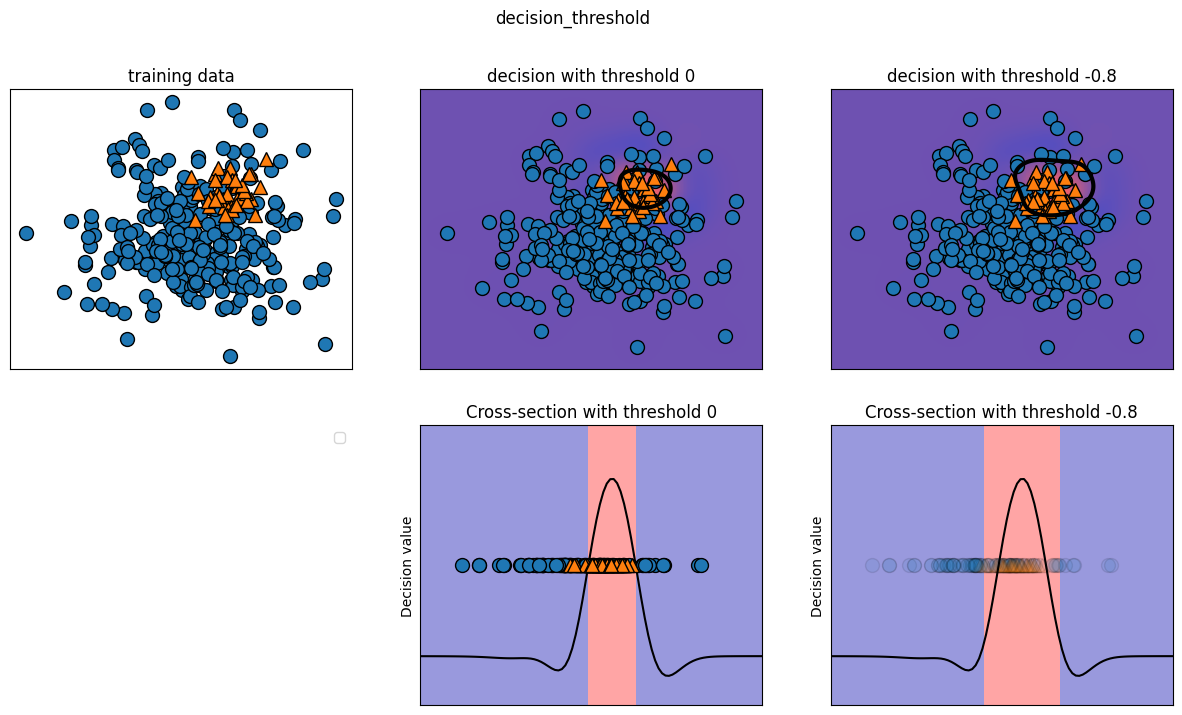

In [39]:
mglearn.plots.plot_decision_threshold()

In [40]:
y_pred_lower_threshold = svc.decision_function(X_test) > -.8

In [41]:
print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       104
           1       0.32      1.00      0.49         9

    accuracy                           0.83       113
   macro avg       0.66      0.91      0.69       113
weighted avg       0.95      0.83      0.87       113



## 3. Кривые точности-полноты и ROC-кривые

Кривая точности-полноты позволяет посмотреть на все значения полноты и точности для пороговых значений.

In [42]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

In [44]:
X, y = make_blobs(n_samples=[4000, 500], cluster_std=[7.0, 2], random_state = 22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
svc = SVC(gamma=.05).fit(X_train, y_train)
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))